In [271]:
import pandas as pd
from googleapiclient.discovery import build

# replace with your own API key
API_KEY = 'Your API Key'

def get_trending_videos(api_key, max_results=200):
    # build the youtube service
    youtube = build('youtube', 'v3', developerKey=api_key)

    # initialize the list to hold video details
    videos = []

    # fetch the most popular videos
    request = youtube.videos().list(
        part='snippet,contentDetails,statistics',
        chart='mostPopular',
        regionCode='IN',
        maxResults=50
    )

    # paginate through the results if max_results > 50
    while request and len(videos) < max_results:
        response = request.execute()
        for item in response['items']:
            video_details = {
                'video_id': item['id'],
                'title': item['snippet']['title'],
                'description': item['snippet']['description'],
                'published_at': item['snippet']['publishedAt'],
                'channel_id': item['snippet']['channelId'],
                'channel_title': item['snippet']['channelTitle'],
                'category_id': item['snippet']['categoryId'],
                'tags': item['snippet'].get('tags', []),
                'duration': item['contentDetails']['duration'],
                'definition': item['contentDetails']['definition'],
                'caption': item['contentDetails'].get('caption', 'false'),
                'view_count': item['statistics'].get('viewCount', 0),
                'like_count': item['statistics'].get('likeCount', 0),
                'dislike_count': item['statistics'].get('dislikeCount', 0),
                'favorite_count': item['statistics'].get('favoriteCount', 0),
                'comment_count': item['statistics'].get('commentCount', 0)
            }
            videos.append(video_details)

        # get the next page token
        request = youtube.videos().list_next(request, response)

    return videos[:max_results]

def save_to_csv(data, filename):
    dm = pd.DataFrame(data)
    dm.to_csv(filename, index=False)

def main():
    trending_videos = get_trending_videos(API_KEY)
    filename = 'trending_videos.csv'
    save_to_csv(trending_videos, filename)
    print(f'Trending videos saved to {filename}')

if __name__ == '__main__':
    main()

Trending videos saved to trending_videos.csv


In [272]:
df=pd.read_csv("trending_videos.csv")
df.head()

,video_id,title,description,published_at,channel_id,channel_title,category_id,tags,duration,definition,caption,view_count,like_count,dislike_count,favorite_count,comment_count
0,nJDclWEjGPA,#TheGOATBdayShots | Thalapathy Vijay | Venkat ...,A special GOATbdayshots from the film The Grea...,2024-06-21T18:31:00Z,UC9WXzTgk10ncJX1eOxHElCg,AGS Entertainment,1,"['Thalapathy Vijay', 'Thalapathy Vijay birthda...",PT51S,hd,False,7677985,487073,0,0,11625
1,4P_k0rqmyX8,Chinna Chinna Kangal (Lyrical) | The Greatest ...,Get ready to melt in this soul stirring melody...,2024-06-22T12:02:01Z,UCq-Fj5jknLsUf-MWSy4_brA,T-Series,10,"['hindi songs 2024', 'hindi songs new', 'bolly...",PT4M42S,hd,False,4597537,525158,0,0,18425
2,SFiZRQZII1g,Living 24 Hours In Space Capsule : Challenge 🤯,SUBSCRIBE: https://youtube.com/MRINDIANHACKER?...,2024-06-22T10:28:03Z,UCSiDGb0MnHFGjs4E2WKvShw,MR. INDIAN HACKER,28,[],PT27M29S,hd,False,2438032,272651,0,0,8836
3,a5XAO2vu8lY,The GOAT | Second Single Promo | Thalapathy V...,Get ready to melt in this soul stirring melody...,2024-06-21T13:00:43Z,UCAEv0ANkT221wXsTnxFnBsQ,T-Series Tamil,10,"['Tamil Songs', 'Latest Tamil Songs', 'Tamil L...",PT29S,hd,False,1338223,104378,0,0,1960
4,33o3s4Vs4Sw,Mirzapur Season 3 - Official Trailer | Pankaj ...,Prime Video India Presents\nMirzapur Season 3 ...,2024-06-20T08:41:24Z,UC4zWG9LccdWGUlF77LZ8toA,Prime Video India,24,"['mirzapur season 3 trailer', 'mirzapur season...",PT2M38S,hd,True,16088359,417706,0,0,18042


In [273]:
df.isnull().sum()

video_id          0
title             0
description       4
published_at      0
channel_id        0
channel_title     0
category_id       0
tags              0
duration          0
definition        0
caption           0
view_count        0
like_count        0
dislike_count     0
favorite_count    0
comment_count     0
dtype: int64

In [274]:
df.dtypes

video_id          object
title             object
description       object
published_at      object
channel_id        object
channel_title     object
category_id        int64
tags              object
duration          object
definition        object
caption             bool
view_count         int64
like_count         int64
dislike_count      int64
favorite_count     int64
comment_count      int64
dtype: object

In [275]:
# filling missing values with "No Description"
df['description'].fillna('No Description',inplace=True)

In [276]:
df.isna().sum()

video_id          0
title             0
description       0
published_at      0
channel_id        0
channel_title     0
category_id       0
tags              0
duration          0
definition        0
caption           0
view_count        0
like_count        0
dislike_count     0
favorite_count    0
comment_count     0
dtype: int64

In [277]:
df.describe()

,category_id,view_count,like_count,dislike_count,favorite_count,comment_count
count,152.000000,1.520000e+02,1.520000e+02,152.0,152.0,152.000000
mean,21.046053,2.048762e+06,6.580498e+04,0.0,0.0,3577.322368
std,6.079320,5.635774e+06,1.371792e+05,0.0,0.0,13774.550045
min,1.000000,2.976200e+04,5.680000e+02,0.0,0.0,20.000000
25%,22.000000,2.396142e+05,5.313500e+03,0.0,0.0,155.000000
50%,24.000000,5.046785e+05,1.169450e+04,0.0,0.0,444.000000
75%,24.000000,1.447189e+06,5.504625e+04,0.0,0.0,1913.500000
max,28.000000,5.592938e+07,1.246266e+06,0.0,0.0,160888.000000


In [278]:
#converting published_at to datetime
df['published_at']=pd.to_datetime(df['published_at'])

#converting tags from string to list
df['tags']=df['tags'].apply(lambda x: eval(x) if isinstance(x,str) else x)

In [279]:
descriptive_stats=df[['view_count','like_count','dislike_count','comment_count']].describe()
descriptive_stats

,view_count,like_count,dislike_count,comment_count
count,1.520000e+02,1.520000e+02,152.0,152.000000
mean,2.048762e+06,6.580498e+04,0.0,3577.322368
std,5.635774e+06,1.371792e+05,0.0,13774.550045
min,2.976200e+04,5.680000e+02,0.0,20.000000
25%,2.396142e+05,5.313500e+03,0.0,155.000000
50%,5.046785e+05,1.169450e+04,0.0,444.000000
75%,1.447189e+06,5.504625e+04,0.0,1913.500000
max,5.592938e+07,1.246266e+06,0.0,160888.000000


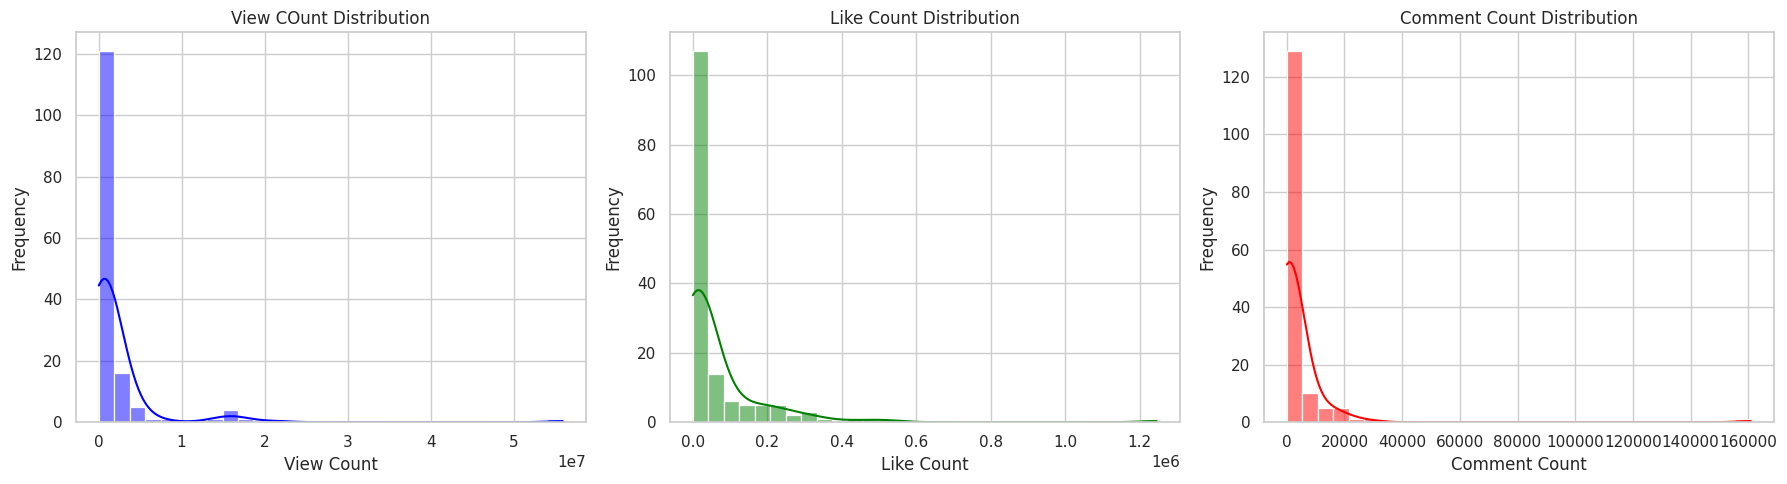

In [280]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import *
sns.set(style='whitegrid')
fig, axes=plt.subplots(1,3, figsize=(18,5))

#view count distribution
sns.histplot(df['view_count'],bins=30,kde=True,ax=axes[0],color='blue')
axes[0].set_title('View COunt Distribution')
axes[0].set_xlabel('View Count')
axes[0].set_ylabel('Frequency')

#like count distribution
sns.histplot(df['like_count'],bins=30,kde=True,ax=axes[1],color='green')
axes[1].set_title('Like Count Distribution')
axes[1].set_xlabel('Like Count')
axes[1].set_ylabel('Frequency')

# Comment count distribution
sns.histplot(df['comment_count'],bins=30,kde=True,ax=axes[2],color='red')
axes[2].set_title('Comment Count Distribution')
axes[2].set_xlabel('Comment Count')
axes[2].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

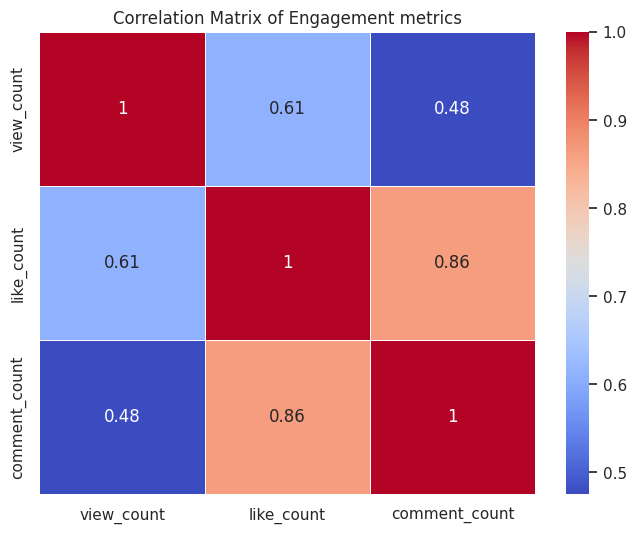

In [281]:
#corrleation matrix
corr_matrix=df[['view_count','like_count','comment_count']].corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix,annot=True,cmap='coolwarm', linewidths=0.5, linecolor='white')
plt.title('Correlation Matrix of Engagement metrics')
plt.show()

In [282]:
#Collecting the Category Name

from googleapiclient.discovery import build
API_KEY='Your API Key'
youtube=build('youtube','v3',developerKey=API_KEY)

def get_category_mapping():
  request=youtube.videoCategories().list(
      part='snippet',
      regionCode='IN',
  )
  response=request.execute()
  category_mapping={}
  for item in response['items']:
    category_id=int(item['id'])
    category_name=item['snippet']['title']
    category_mapping[category_id]=category_name
  return category_mapping

#get the category mapping
category_mapping=get_category_mapping()
category_mapping

{1: 'Film & Animation',
 2: 'Autos & Vehicles',
 10: 'Music',
 15: 'Pets & Animals',
 17: 'Sports',
 18: 'Short Movies',
 19: 'Travel & Events',
 20: 'Gaming',
 21: 'Videoblogging',
 22: 'People & Blogs',
 23: 'Comedy',
 24: 'Entertainment',
 25: 'News & Politics',
 26: 'Howto & Style',
 27: 'Education',
 28: 'Science & Technology',
 30: 'Movies',
 31: 'Anime/Animation',
 32: 'Action/Adventure',
 33: 'Classics',
 34: 'Comedy',
 35: 'Documentary',
 36: 'Drama',
 37: 'Family',
 38: 'Foreign',
 39: 'Horror',
 40: 'Sci-Fi/Fantasy',
 41: 'Thriller',
 42: 'Shorts',
 43: 'Shows',
 44: 'Trailers'}

<ipython-input-283-a35686333a92>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df['category_name'], order=df['category_name'].value_counts().index, palette='viridis')


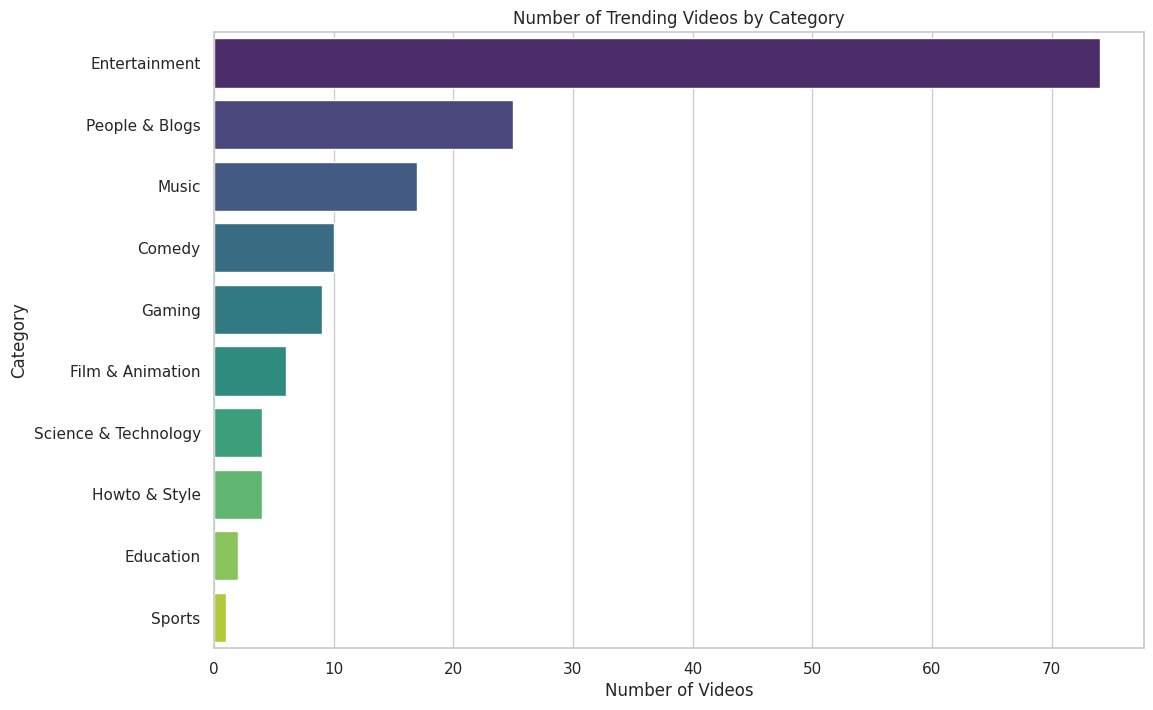

In [283]:
df['category_name']=df['category_id'].map(category_mapping)

#Bar chart for category counts
plt.figure(figsize=(12,8))
sns.countplot(y=df['category_name'], order=df['category_name'].value_counts().index, palette='viridis')
plt.title('Number of Trending Videos by Category')
plt.xlabel('Number of Videos')
plt.ylabel('Category')
plt.show()

<ipython-input-284-1ad8d6cd19bc>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=category_stats.index,x=category_stats['view_count'],ax=axes[0],palette='viridis')
<ipython-input-284-1ad8d6cd19bc>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=category_stats.index,x=category_stats['like_count'],ax=axes[1],palette='viridis')
<ipython-input-284-1ad8d6cd19bc>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=category_stats.index,x=category_stats['comment_count'],ax=axes[2],palette='viridis')


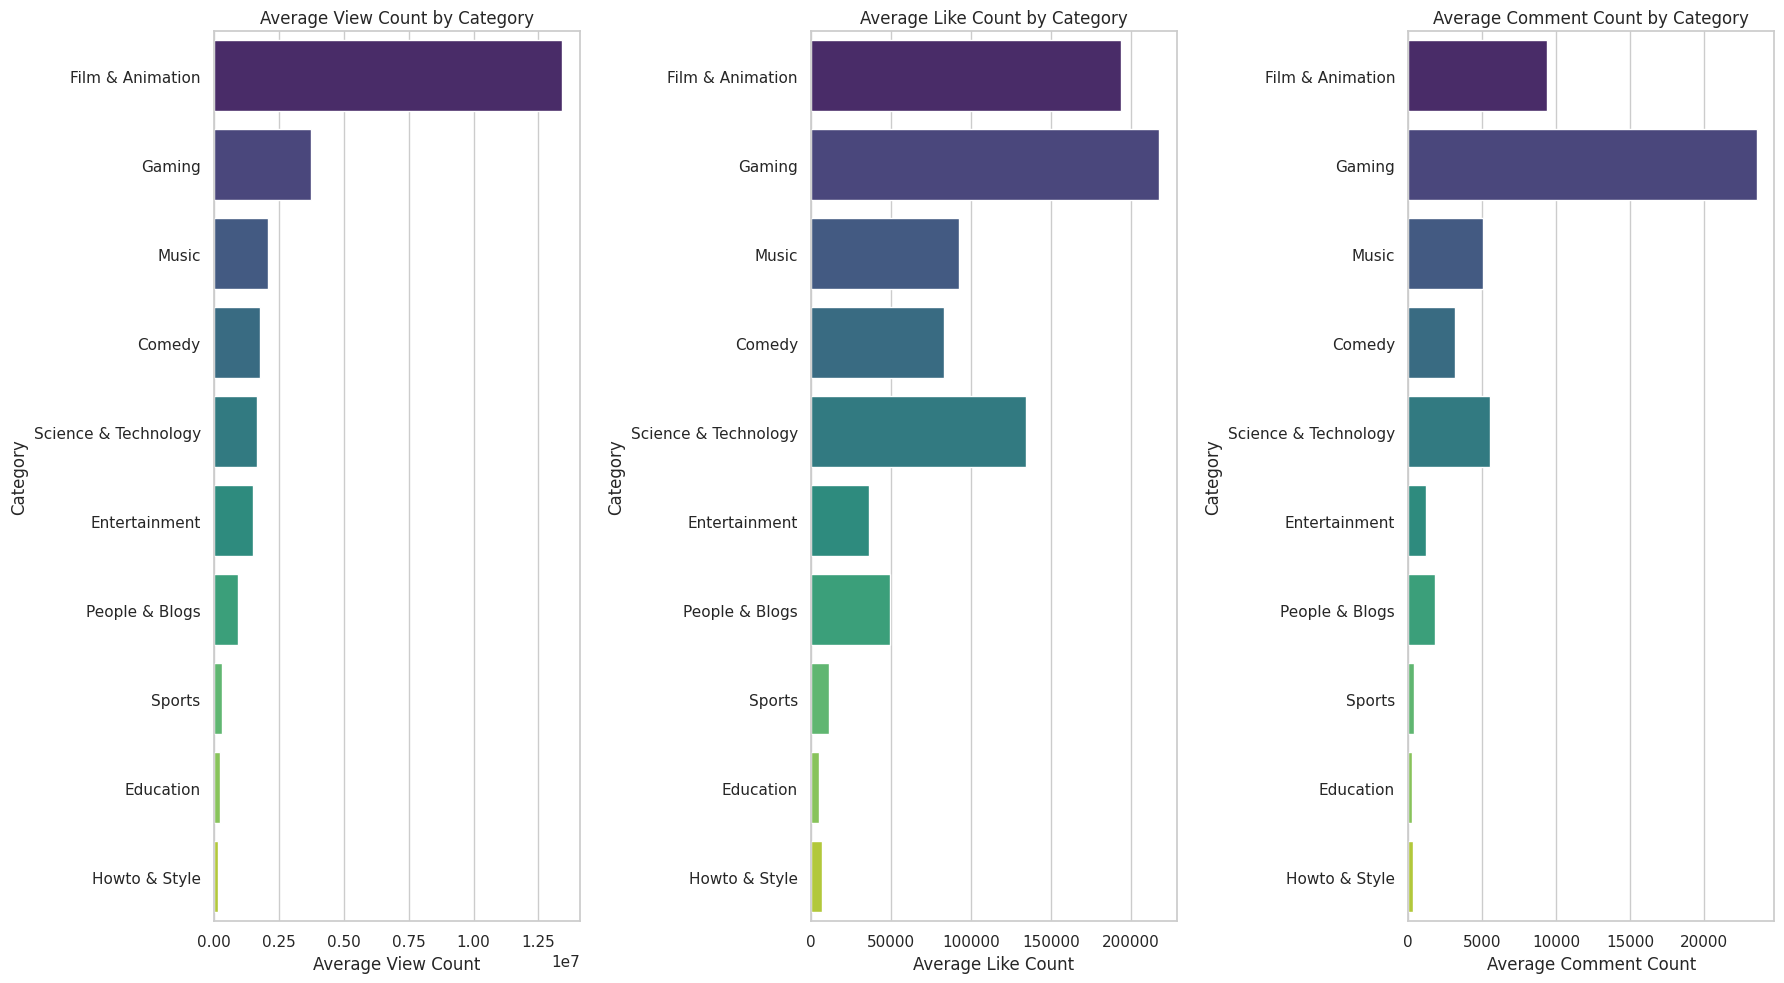

In [284]:
#average engagement metrics by category
category_stats=df.groupby('category_name')[['view_count','like_count', 'comment_count']].mean().sort_values(by='view_count',ascending=False)

fig,axes=plt.subplots(1,3,figsize=(18,10))

#view count by category
sns.barplot(y=category_stats.index,x=category_stats['view_count'],ax=axes[0],palette='viridis')
axes[0].set_title('Average View Count by Category')
axes[0].set_xlabel('Average View Count')
axes[0].set_ylabel('Category')

#like count by category
sns.barplot(y=category_stats.index,x=category_stats['like_count'],ax=axes[1],palette='viridis')
axes[1].set_title('Average Like Count by Category')
axes[1].set_xlabel('Average Like Count')
axes[1].set_ylabel('Category')

#comment count by category
sns.barplot(y=category_stats.index,x=category_stats['comment_count'],ax=axes[2],palette='viridis')
axes[2].set_title('Average Comment Count by Category')
axes[2].set_xlabel('Average Comment Count')
axes[2].set_ylabel('Category')

plt.tight_layout()
plt.show()

In [285]:
!pip install isodate

In [286]:
#convert ISO 8601 duration to seconds
import isodate
df['duration_seconds']= df['duration'].apply(lambda x: isodate.parse_duration(x).total_seconds())

df['duration_range']=pd.cut(df['duration_seconds'],bins=[0,300,600,1200,3600,7200],labels=['0-5 min','5-10 min','10-20 min', '20-60 min','60-120 min'])

In [287]:
df.isna().sum()

video_id            0
title               0
description         0
published_at        0
channel_id          0
channel_title       0
category_id         0
tags                0
duration            0
definition          0
caption             0
view_count          0
like_count          0
dislike_count       0
favorite_count      0
comment_count       0
category_name       0
duration_seconds    0
duration_range      1
dtype: int64

In [288]:
#identifying rows where null value is present. check if the null value is present in your dataset
df[df['duration_range'].isnull()]

,video_id,title,description,published_at,channel_id,channel_title,category_id,tags,duration,definition,caption,view_count,like_count,dislike_count,favorite_count,comment_count,category_name,duration_seconds,duration_range
141,Ymz8vZtHVtU,🔴[Live] Awm King Is Back🔥🗿Top 1 GrandMaster💖-G...,"🔊So , Hi Guys I'm Ayush and Welcome to our cha...",2024-06-18 11:55:10+00:00,UCgsWayzDGwj9CclwicO_R3w,UnGraduate Gamer,20,"[free fire live, free fire live now, ff live, ...",PT5H6M5S,hd,False,1747098,7241,0,0,88,Gaming,18365.0,NaN


In [289]:
#fill those null values with most frequent values
most_frequent=df['duration_range'].mode()[0]
df['duration_range'].fillna(most_frequent,inplace=True)

In [290]:
df.isna().sum()

video_id            0
title               0
description         0
published_at        0
channel_id          0
channel_title       0
category_id         0
tags                0
duration            0
definition          0
caption             0
view_count          0
like_count          0
dislike_count       0
favorite_count      0
comment_count       0
category_name       0
duration_seconds    0
duration_range      0
dtype: int64

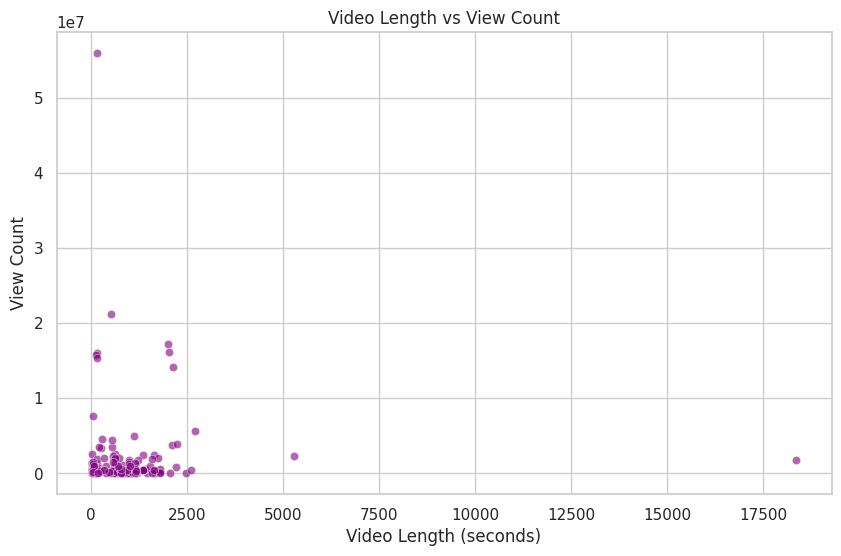

In [291]:
#scatter plot for video length vs view count
plt.figure(figsize=(10,6))
sns.scatterplot(x='duration_seconds',y='view_count',data=df,color='purple',alpha=0.6)
plt.title('Video Length vs View Count')
plt.xlabel('Video Length (seconds)')
plt.ylabel('View Count')

plt.show()

<ipython-input-292-996c73fc0960>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=length_stats.index, x=length_stats['view_count'],ax=axes[0],palette='magma')
<ipython-input-292-996c73fc0960>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=length_stats.index, x=length_stats['like_count'],ax=axes[1],palette='magma')
<ipython-input-292-996c73fc0960>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=length_stats.index, x=length_stats['comment_count'],ax=axes[2],palette='magma')


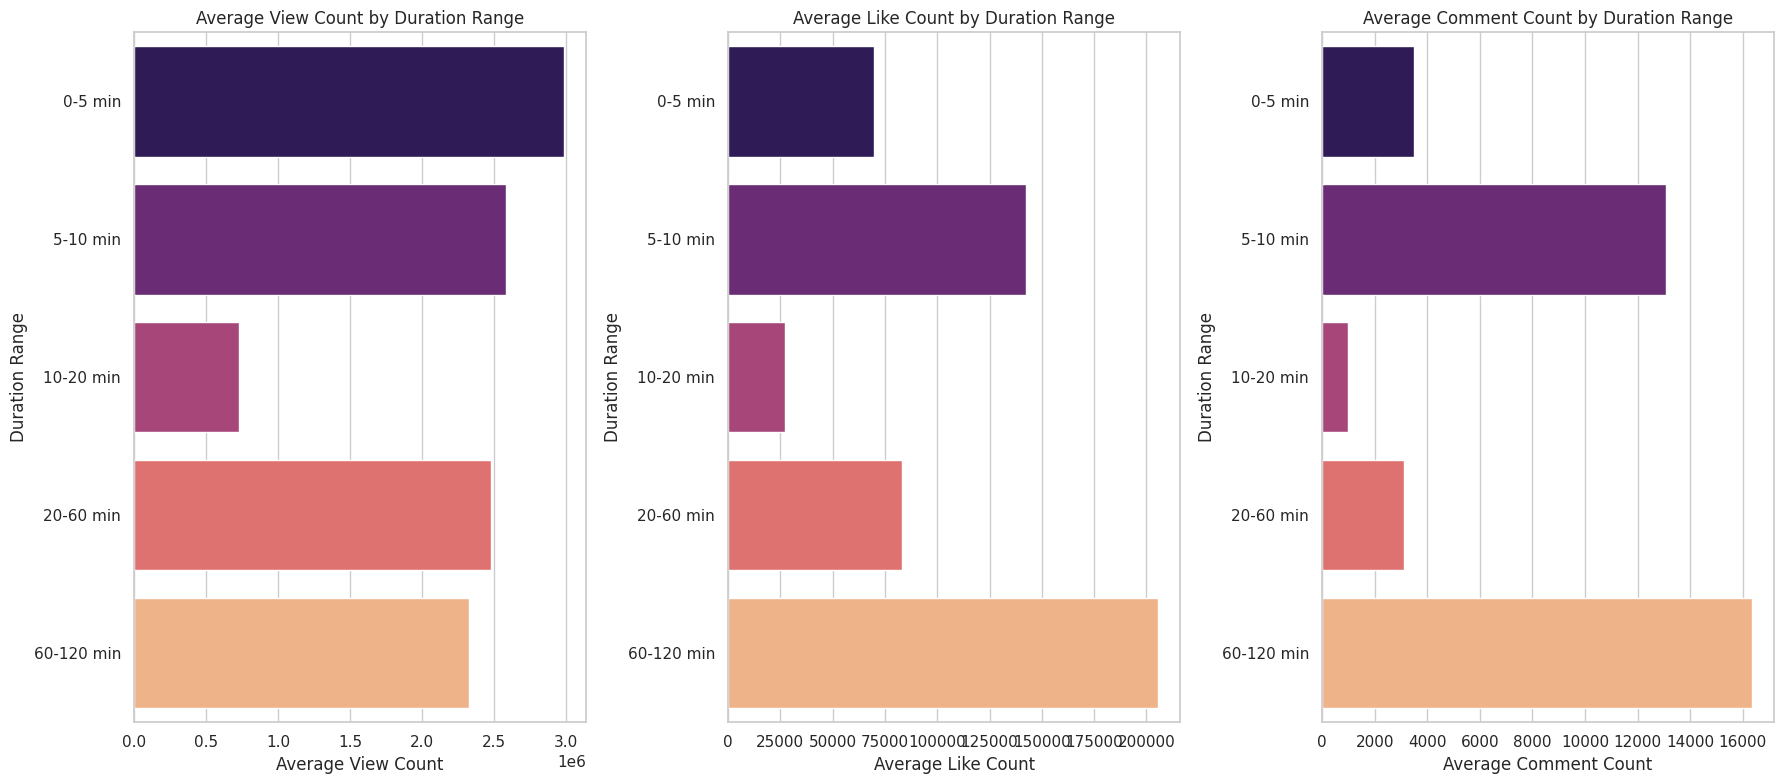

In [292]:
#bar chart for engagement metrics by duration range
length_stats=df.groupby('duration_range')[['view_count','like_count','comment_count']].mean()

fig, axes=plt.subplots(1,3,figsize=(18,8))
# view count by duration range
sns.barplot(y=length_stats.index, x=length_stats['view_count'],ax=axes[0],palette='magma')
axes[0].set_title('Average View Count by Duration Range')
axes[0].set_xlabel('Average View Count')
axes[0].set_ylabel('Duration Range')

# like count by duration range
sns.barplot(y=length_stats.index, x=length_stats['like_count'],ax=axes[1],palette='magma')
axes[1].set_title('Average Like Count by Duration Range')
axes[1].set_xlabel('Average Like Count')
axes[1].set_ylabel('Duration Range')

# comment count by duration range
sns.barplot(y=length_stats.index, x=length_stats['comment_count'],ax=axes[2],palette='magma')
axes[2].set_title('Average Comment Count by Duration Range')
axes[2].set_xlabel('Average Comment Count')
axes[2].set_ylabel('Duration Range')

plt.tight_layout()
plt.show()

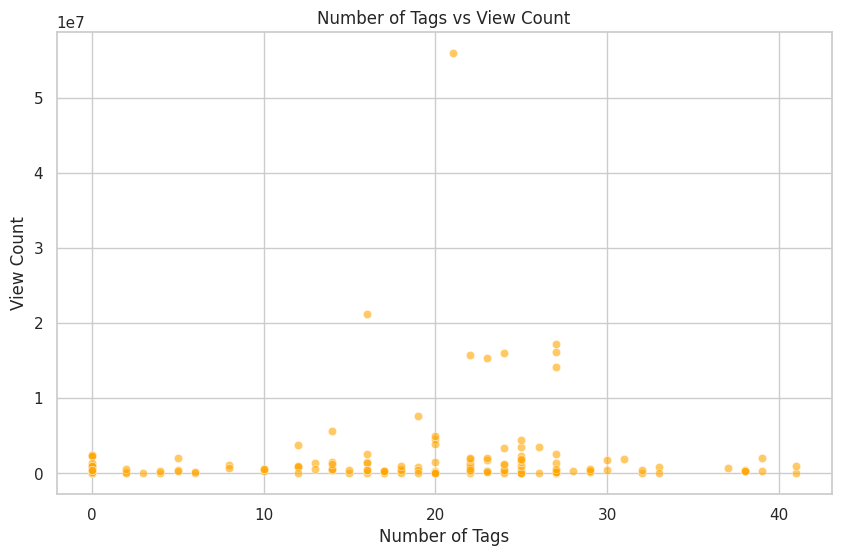

In [293]:
#analyze the relation between views and number of tags used in  the video

#calculate the no. of tags for each video
df['tag_count']=df['tags'].apply(len)
#scatter plot for number of tags vs view count
plt.figure(figsize=(10,6))
sns.scatterplot(x='tag_count',y='view_count',data=df,alpha=0.6,color='orange')
plt.title('Number of Tags vs View Count')
plt.xlabel('Number of Tags')
plt.ylabel('View Count')
plt.show()

<ipython-input-294-efa61ab9b7a0>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='publish_hour',data=df,palette='coolwarm')


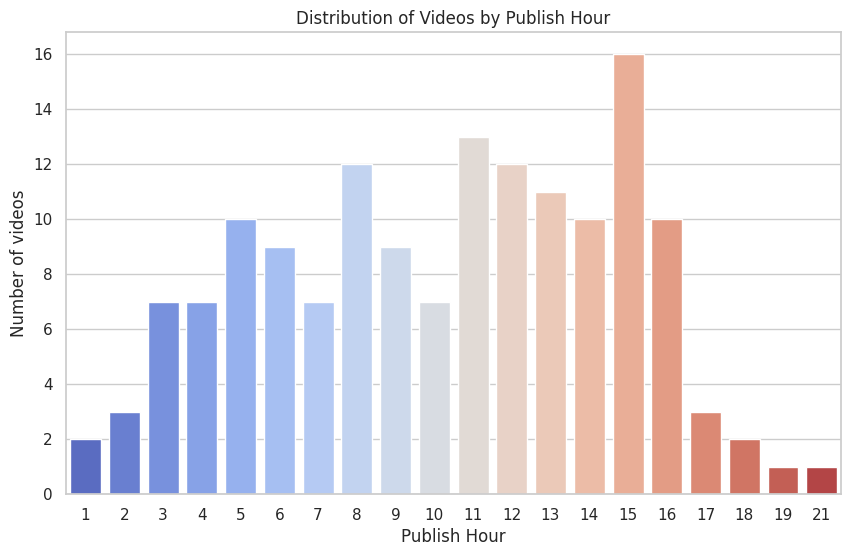

In [294]:
#impact of the time a video is posted on its views

#extract hour of publication
df['publish_hour']=df['published_at'].dt.hour

#bar chart for publish hour distribution
plt.figure(figsize=(10,6))
sns.countplot(x='publish_hour',data=df,palette='coolwarm')
plt.title('Distribution of Videos by Publish Hour')
plt.xlabel('Publish Hour')
plt.ylabel('Number of videos')
plt.show()

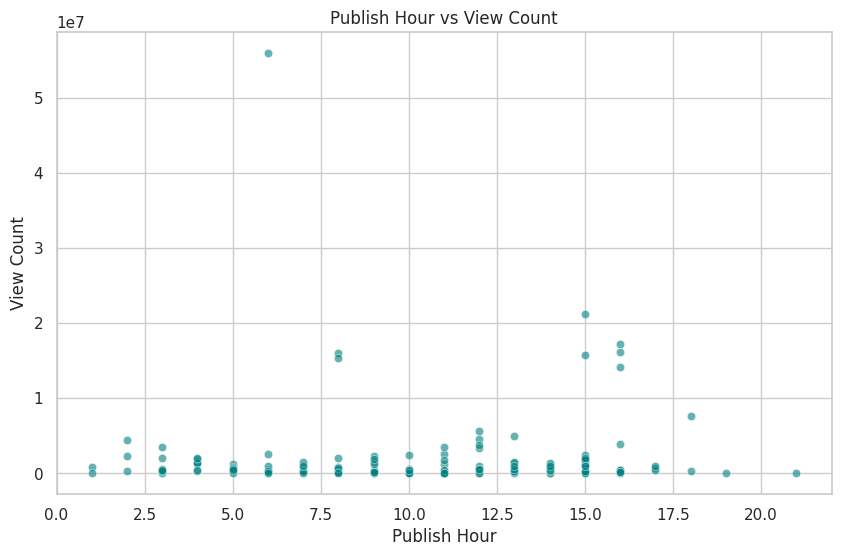

In [295]:
#scatter plot for publish hour vs view count
plt.figure(figsize=(10,6))
sns.scatterplot(x='publish_hour',y='view_count',data=df,alpha=0.6,color='teal')
plt.title('Publish Hour vs View Count')
plt.xlabel('Publish Hour')
plt.ylabel('View Count')
plt.show()

In [296]:
#final dataset
df.to_csv('Final_Dataset.csv',index=False)